# 神经网络练习1:为二手丰田卡罗拉定价
## 加载和预处理数据集

In [1]:
library(mxnet)
library(caret)
library(forecast)

Loading required package: lattice

Loading required package: ggplot2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



读取数据,并转化成dataframe

In [2]:
toyota.df <- read.csv("https://github.com/Jerrywang959/note_viajupyterbook/raw/master/datas/ToyotaCorolla.csv")
str(toyota.df)

'data.frame':	1436 obs. of  39 variables:
 $ Id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Model            : chr  "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "\xa0TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" "TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors" ...
 $ Price            : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age_08_04        : int  23 23 24 26 30 32 27 30 27 23 ...
 $ Mfg_Month        : int  10 10 9 7 3 1 6 3 6 10 ...
 $ Mfg_Year         : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ KM               : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ Fuel_Type        : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP               : int  90 90 90 90 90 90 90 90 192 69 ...
 $ Met_Color        : int  1 1 1 0 0 0 1 1 0 0 ...
 $ Color            : chr  "Blue" "Silver" "Blue" "Black" ...
 $ Automatic        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC   

我们用`Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model and Tow_Bar`来预测价格,因此删除不需要的变量

In [3]:
toyota=toyota.df[,-c(1,2,5,6,10,11,13,15,16,18,20,22,23,24,27,29,31,32,33,35,36,37,38)]
str(toyota)

'data.frame':	1436 obs. of  16 variables:
 $ Price           : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age_08_04       : int  23 23 24 26 30 32 27 30 27 23 ...
 $ KM              : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ Fuel_Type       : chr  "Diesel" "Diesel" "Diesel" "Diesel" ...
 $ HP              : int  90 90 90 90 90 90 90 90 192 69 ...
 $ Automatic       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Doors           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Quarterly_Tax   : int  210 210 210 210 210 210 210 210 100 185 ...
 $ Mfr_Guarantee   : int  0 0 1 1 1 0 0 1 0 0 ...
 $ Guarantee_Period: int  3 3 3 3 3 3 3 3 3 3 ...
 $ Airco           : int  0 1 0 0 1 1 1 1 1 1 ...
 $ Automatic_airco : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CD_Player       : int  0 1 0 0 0 0 0 1 0 0 ...
 $ Powered_Windows : int  1 0 0 0 1 1 1 1 1 0 ...
 $ Sport_Model     : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Tow_Bar         : int  0 0 0 0 0 0 0 0 0 0 ...


把字符串类型变量`Fuel_Type`转化为虚拟变量.因为Fuel_Type有三种类型的字符串 Fuel_Type=="CNG" 则赋值`Fuel_Type_CNG`为1. Fuel_Type=="Diesel"则赋值`Fuel_Type_Diesel`为1.最后删除`Fuel_Type`这一变量

In [4]:
toyota$Fuel_Type_CNG <- 1* (toyota$Fuel_Type == "CNG")
toyota$Fuel_Type_Diesel <- 1* (toyota$Fuel_Type == "Diesel")
toyota=toyota[,-4]
str(toyota)

'data.frame':	1436 obs. of  17 variables:
 $ Price           : int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age_08_04       : int  23 23 24 26 30 32 27 30 27 23 ...
 $ KM              : int  46986 72937 41711 48000 38500 61000 94612 75889 19700 71138 ...
 $ HP              : int  90 90 90 90 90 90 90 90 192 69 ...
 $ Automatic       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Doors           : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Quarterly_Tax   : int  210 210 210 210 210 210 210 210 100 185 ...
 $ Mfr_Guarantee   : int  0 0 1 1 1 0 0 1 0 0 ...
 $ Guarantee_Period: int  3 3 3 3 3 3 3 3 3 3 ...
 $ Airco           : int  0 1 0 0 1 1 1 1 1 1 ...
 $ Automatic_airco : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CD_Player       : int  0 1 0 0 0 0 0 1 0 0 ...
 $ Powered_Windows : int  1 0 0 0 1 1 1 1 1 0 ...
 $ Sport_Model     : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Tow_Bar         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel_Type_CNG   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel_Type_Diesel: num  1 1 1 1 1 1

对于价格,一般都求log

In [5]:
toyota$Price=log(toyota$Price)

将数据集拆分为训练和验证集。我们在这里使用另一个函数`sample()`

In [6]:
set.seed(1)
train.index <- sample(row.names(toyota), 0.6*dim(toyota)[1])  
valid.index <- setdiff(row.names(toyota), train.index) 
train <- toyota[train.index, ]
valid <- toyota[valid.index, ]

我们首先在包插入符号中使用函数preProcess将数字变量缩放为0-1，并将转换保存到preProcValues。然后使用`predict()`将转换应用于数据。

In [7]:
preProcValues=preProcess(train,method = "range",rangeBounds = c(0,1))
trainTransformed <- predict(preProcValues, train)
validTransformed <- predict(preProcValues, valid)
str(validTransformed)

'data.frame':	575 obs. of  17 variables:
 $ Price           : num  0.563 0.572 0.614 0.795 0.542 ...
 $ Age_08_04       : num  0.278 0.278 0.316 0.329 0.278 ...
 $ KM              : num  0.2154 0.3344 0.2201 0.0903 0.3261 ...
 $ HP              : num  0.171 0.171 0.171 1 0 ...
 $ Automatic       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Doors           : num  0.333 0.333 0.333 0.333 0.333 ...
 $ Quarterly_Tax   : num  0.723 0.723 0.723 0.307 0.629 ...
 $ Mfr_Guarantee   : num  0 0 1 0 0 1 1 0 0 0 ...
 $ Guarantee_Period: num  0 0 0 0 0 ...
 $ Airco           : num  0 1 0 1 1 1 1 1 1 1 ...
 $ Automatic_airco : num  0 0 0 0 0 1 1 1 0 1 ...
 $ CD_Player       : num  0 1 0 0 0 0 1 0 0 1 ...
 $ Powered_Windows : num  1 0 0 1 0 1 1 1 1 1 ...
 $ Sport_Model     : num  0 0 0 0 0 1 1 1 0 1 ...
 $ Tow_Bar         : num  0 0 0 0 0 0 0 0 1 1 ...
 $ Fuel_Type_CNG   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fuel_Type_Diesel: num  1 1 1 0 1 0 0 0 0 0 ...


## 训练神经网络
我们将在包`mxnet`中使用`mx.mlp()`函数。数据和标签表示x和y。让我们首先创建它们。

In [8]:
train.x=data.matrix(trainTransformed[,2:17])
train.y=trainTransformed[,1]

`hidden_node`:隐藏层中的节点数。c(2,3)表示有2个隐藏层，第一个隐藏层具有2个神经元，第二个隐藏层具有3个。   
`out_node = 1`:由于是回归问题,因此在输出层中有1个节点   
`activation ="relu"`: 激活函数选择`relu`,也可以选择`Sigmoid,tanh`    
`out_activation ="rmse"`:输出层中的激活函数；对于分类问题，默认值为softmax。  
`array.layout ="rowmajor"`：如果row是数据的实例  
`num.round`：迭代次数   
`array.batch.size`：每个批次中的样本数 
`learning.rate`：梯度下降中的学习率  
`momentum`: 带有动量的梯度下降考虑了过去的梯度以平滑更新。它计算渐变的指数加权平均值，然后使用该渐变来更新您的权重。它比标准的梯度下降算法更快地工作。这是介于0到1之间的数字。   
`eval_metric`：  评估指标。分类问题可以使用mx.metric.accuracy


In [9]:
mx.set.seed(1)
model<-mx.mlp(train.x, train.y, hidden_node=c(4,4), activation = "tanh",out_node=1,out_activation="rmse",array.layout="rowmajor", num.round=50, array.batch.size=15, learning.rate=0.1, momentum=0.9, eval.metric=mx.metric.rmse)

Start training with 1 devices

[1] Train-rmse=0.183488687949962

[2] Train-rmse=0.153313753548367

[3] Train-rmse=0.153974139741782

[4] Train-rmse=0.154017912416623

[5] Train-rmse=0.154020231730979

[6] Train-rmse=0.15402033282765

[7] Train-rmse=0.154020323193279

[8] Train-rmse=0.154020316128073

[9] Train-rmse=0.154020304309911

[10] Train-rmse=0.154020291977915

[11] Train-rmse=0.154020283242752

[12] Train-rmse=0.154020263717092

[13] Train-rmse=0.154020254339637

[14] Train-rmse=0.154020238924643

[15] Train-rmse=0.154020228519522

[16] Train-rmse=0.154020210149987

[17] Train-rmse=0.1540201987172

[18] Train-rmse=0.154020177650041

[19] Train-rmse=0.154020161721213

[20] Train-rmse=0.154020142195554

[21] Train-rmse=0.154020116889271

[22] Train-rmse=0.154020088243073

[23] Train-rmse=0.154020059853792

[24] Train-rmse=0.15402002928072

[25] Train-rmse=0.154019988944818

[26] Train-rmse=0.154019947067417

[27] Train-rmse=0.15401990634614

[28] Train-rmse=0.15401985316441

[29]

生成的神经网络中的权重和偏差可以通过`model$arg.params`找到。

In [10]:
model$arg.params

$fullyconnected0_weight
              [,1]         [,2]          [,3]         [,4]
 [1,]  0.000251364  0.002721510  0.0227664988  0.015098012
 [2,]  0.007656842  0.007514593  0.0155111169  0.013211223
 [3,] -0.001833370 -0.002022291  0.0066052107 -0.001807258
 [4,] -0.005291542  0.004286422  0.0010420483 -0.007832700
 [5,]  0.003257737 -0.011945103 -0.0126218610  0.001095789
 [6,] -0.001088850 -0.004286718  0.0030281481 -0.002240660
 [7,]  0.008684259 -0.007507119 -0.0174596384 -0.010892521
 [8,] -0.005166853  0.007712031 -0.0021526928  0.001577258
 [9,] -0.004102852 -0.002837309 -0.0146477185 -0.014754630
[10,]  0.004337608 -0.014782390 -0.0178184658 -0.014386953
[11,]  0.003708433 -0.011563182 -0.0172139946 -0.014998819
[12,]  0.006491954 -0.004553760 -0.0156454649 -0.002145444
[13,] -0.000991428 -0.007957110 -0.0117291473  0.001156766
[14,] -0.005837713  0.004476704  0.0091741346  0.002934348
[15,] -0.006012313  0.008900746 -0.0009431211 -0.006508498
[16,]  0.006296108  0.007908014 

## 预测验证集
使用训练有素的模型来预测测试集。这里的`predit()`将使用模型来预测valid.x。

In [11]:
valid.x=data.matrix(validTransformed[,2:17])
valid.y=validTransformed[,1]
preds = predict(model, valid.x, array.layout="rowmajor")
preds=as.vector(preds)

可以通过包装预测中的函数 `precision()` 计算预测精度。

In [12]:
accu=accuracy(preds, valid.y)
accu

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.006539717,0.1417234,0.1112813,-13.51134,30.00869


有效均方根值为0.14 
ME：平均误差  
RMSE：均方根误差  
MAE：平均绝对误差   
MPE：平均百分比误差  
MAPE：平均绝对百分比误差  


## 调整模型
让我们降低学习率并增加迭代次数。并通过辍学简化模型。   
这里的dropout是`[0,1)`中的数字，其中包含从最后一个隐藏层到输出层的丢失率。

In [13]:
mx.set.seed(1)
model2<-mx.mlp(train.x, train.y, hidden_node=c(4,5), activation = "tanh",out_node=1, dropout=0.2, out_activation="rmse",array.layout="rowmajor", num.round=100, array.batch.size=15, learning.rate=0.05, momentum=0.9, eval.metric=mx.metric.rmse)

Start training with 1 devices

[1] Train-rmse=0.181136857846688

[2] Train-rmse=0.14961624505191

[3] Train-rmse=0.149909008294344

[4] Train-rmse=0.149925264947373

[5] Train-rmse=0.14992555975914

[6] Train-rmse=0.149925827851583

[7] Train-rmse=0.149925471508297

[8] Train-rmse=0.149925226024513

[9] Train-rmse=0.149925478316587

[10] Train-rmse=0.14992534536226

[11] Train-rmse=0.149925387881953

[12] Train-rmse=0.149925299759569

[13] Train-rmse=0.14992560921558

[14] Train-rmse=0.149925383771288

[15] Train-rmse=0.1499252824177

[16] Train-rmse=0.14992511529347

[17] Train-rmse=0.149924984908309

[18] Train-rmse=0.149924703327746

[19] Train-rmse=0.149925772999895

[20] Train-rmse=0.149925673316265

[21] Train-rmse=0.149925271241829

[22] Train-rmse=0.149925235530426

[23] Train-rmse=0.149925186844735

[24] Train-rmse=0.149924863900604

[25] Train-rmse=0.149924803653668

[26] Train-rmse=0.149925042842997

[27] Train-rmse=0.149924286994441

[28] Train-rmse=0.149924871222726

[29] 

让我们检查准确性。

In [14]:
preds2 = as.vector(predict(model2, valid.x, array.layout="rowmajor"))
accu2=accuracy(preds2, valid.y)
accu2

,ME,RMSE,MAE,MPE,MAPE
Test set,-0.004508121,0.05052696,0.03975079,-3.564681,11.37297


有效均方根值是0.05，比以前的模型好。

## 绘制预测价格和真实价格
当前的preds2是标准化的标签。让我们重置它们。

In [15]:
real.preds2=exp(preds2*(max(train[,1])-min(train[,1]))+min(train[,1]))
real.valid.y=exp(valid[,1])

让我们使用`ggplot()`，让我们首先将预测价格和真实价格合并为一列。使用“预测”或“正确”来标记它们。

In [16]:
result_compare2=rbind(cbind(seq(1:575),real.valid.y,rep("True",575)),cbind(seq(1:575),real.preds2,rep("Predict",575)))

将矩阵转换为data.frame。

In [18]:
result_compare2=as.data.frame(result_compare2)
colnames(result_compare2)=c("Index","Price","Value")

我们需要将指数和价格转换为数字变量。

In [21]:
result_compare2$Index=as.numeric(result_compare2$Index)
result_compare2$Price=as.numeric(result_compare2$Price)
## 在R 3.5-3.6中 ,应该使用
## result_compare2$Index=as.numeric(levels(result_compare2$Index))[result_compare2$Index]
##  result_compare2$Price=as.numeric(levels(result_compare2$Price))[result_compare2$Price]
## 这一差异的产生是因为3.5-3.6的R预测变量结果类型是factor 而这里是是 str

使用`ggplot()`绘制它们。

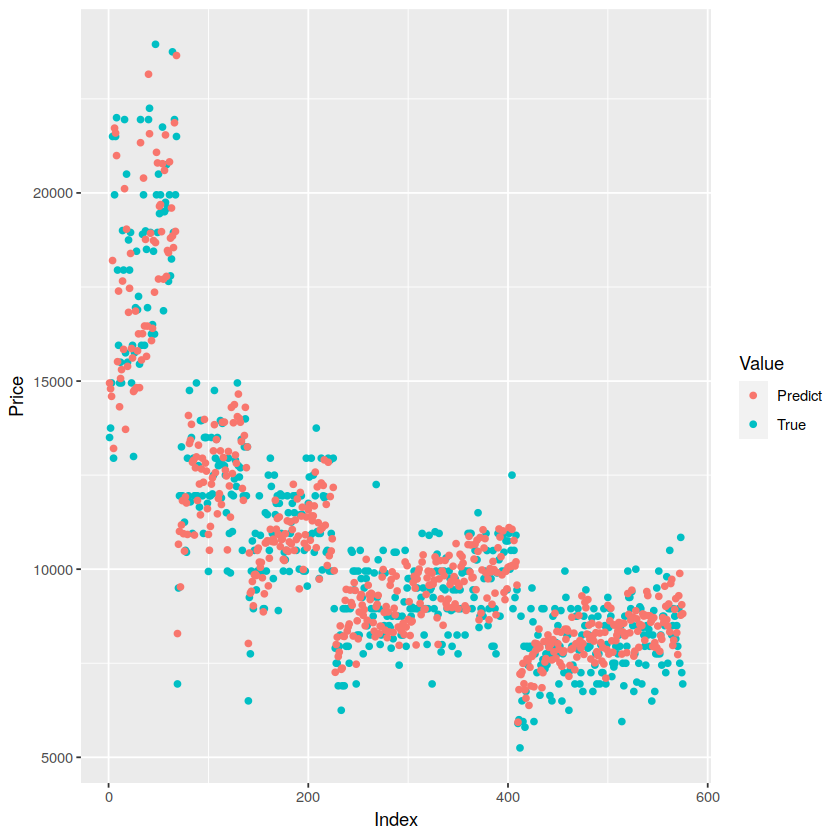

In [23]:
ggplot(result_compare2, aes(x=Index, y=Price, colour=Value)) + geom_point()